To save data, use Pickle module.
It can fetch almost all the Python objects, Encapsulation it into strings.

In [13]:
from PIL import Image
from pylab import *
from numpy import *

def histeq(im,nbr_bins=256):
    """    Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    
    return im2.reshape(im.shape), cdf

im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg').convert('L'))
im_hisequal, cdf = histeq(im)



In [14]:
import pickle

f = open('/Users/stephaniexia/Documents/Code/CV_basic/test.pkl', 'wb')
pickle.dump(im_hisequal,f)
pickle.dump(cdf,f)
f.close()

In [15]:
# load mean and principal components
f = open('/Users/stephaniexia/Documents/Code/CV_basic/test.pkl', 'rb')
im_hisequal = pickle.load(f)
cdf = pickle.load(f)
f.close()

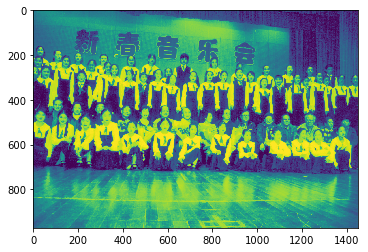

In [19]:
imshow(im_hisequal)